# <font color=#025dfa> Derin Öğrenin Regression Populerliğe Bağlı Film Öneri Sistemleri - Deep Learning Regression Popularity Based Movie Recommendation Systems

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, kullanıcıların film tercihlerini anlamak ve kişiselleştirilmiş öneriler sunmak amacıyla film öneri sistemleri geliştirmeyi hedeflemektedir. Farklı öneri yöntemleri, örneğin içerik tabanlı filtreleme, işbirlikçi filtreleme ve derin öğrenme teknikleri kullanılarak, kullanıcıların izleme geçmişi ve film özellikleri üzerinden en uygun film önerileri sağlanacaktır. Proje, sinema endüstrisinde kullanıcı memnuniyetini artırmak ve izleme deneyimini zenginleştirmek için etkili bir öneri sistemi sunmayı amaçlamaktadır.

EN = This project aims to develop movie recommendation systems to understand users' movie preferences and provide personalized recommendations. Using different recommendation methods, such as content-based filtering, collaborative filtering, and deep learning techniques, the most suitable movie recommendations will be provided based on users' viewing history and movie features. The project aims to provide an effective recommendation system to increase user satisfaction and enrich the viewing experience in the movie industry.

Kaynak/Source = https://www.kaggle.com/competitions/ctrl-shift-intelligence-2k22

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import tensorflow as tf
import re
import pickle
import warnings
warnings.filterwarnings('ignore')

from scipy import spatial #harital üzerindeki mesafeyi ölçüyor

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Flatten, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from scipy import spatial

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,userID,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,7.7
1,1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0,8.3
2,2,2,Get Up and Dance!,1994.0,video movie,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0,8.1
3,3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0,6.9
4,4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN,NaN


In [4]:
df.sample(5)

,Unnamed: 0,userID,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
2113,2113,2113,The Hidden Wars of Desert Storm,2001.0,movie,['Documentary'],140.0,['United States'],['English'],"['Ramsey Clark', 'John Hurt', 'Scott Ritter', ...","['Audrey Brohy', 'Gerard Ungerman']",['Fritz Heede'],"['Audrey Brohy', 'Gerard Ungerman']",64.0,7.8
2439,2439,2439,Eddie Izzard: Glorious,1997.0,video movie,"['Documentary', 'Comedy']",2503.0,['United Kingdom'],['English'],"['Eddie Izzard', 'Mac McDonald', 'Rhona Mitra']",['Peter Richardson'],['Sarah Townsend'],['Eddie Izzard'],99.0,8.4
2242,2242,2242,Pelle the Conqueror,1987.0,movie,['Drama'],10690.0,"['Denmark', 'Sweden']","['Finnish', 'Scanian', 'Danish', 'Swedish']","['Pelle Hvenegaard', 'Max von Sydow', 'Erik Pa...",['Bille August'],['Stefan Nilsson'],"['Martin Andersen Nexø', 'Bille August', 'Per ...",157.0,7.8
4147,4147,4147,Truman,2015.0,movie,"['Comedy', 'Drama']",12492.0,"['Spain', 'Argentina']","['Spanish', 'English']","['Ricardo Darín', 'Javier Cámara', 'Dolores Fo...",['Cesc Gay'],"['Nico Cota', 'Toti Soler']","['Tomàs Aragay', 'Cesc Gay']",108.0,7.3
4004,4004,4004,Dead Calm,1989.0,movie,"['Horror', 'Thriller']",38636.0,['Australia'],['English'],"['Nicole Kidman', 'Sam Neill', 'Billy Zane', '...",['Phillip Noyce'],['Graeme Revell'],"['Terry Hayes', 'Charles Williams']",96.0,6.8


In [5]:
df.tail()

,Unnamed: 0,userID,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
7996,7996,7996,The Best of Friends,1991.0,tv movie,['Biography'],111.0,['United Kingdom'],['English'],"['John Gielgud', 'Wendy Hiller', 'Patrick McGo...",['Alvin Rakoff'],NaN,"['Sidney Cockerell', 'Felicitas Corrigan', 'La...",81.0,7.7
7997,7997,7997,The Pallisers,1974.0,tv mini series,"['Drama', 'Romance']",453.0,['United Kingdom'],['English'],"['Susan Hampshire', 'Philip Latham', 'Barbara ...",NaN,NaN,"['Simon Raven', 'Anthony Trollope']",1335.0,8.2
7998,7998,7998,Elmo's Magic Cookbook,2001.0,video movie,['Family'],26.0,['United States'],['English'],"['Emeril Lagasse', 'Heather Headley', 'Kevin C...","['Lisa Simon', 'Ted May', 'Jon Stone']",['Joe Carroll'],"['Joey Mazzarino', 'Sara Compton', 'G. Ross Pa...",48.0,7.3
7999,7999,7999,Gilligan's Island: Season 3 Introduction,2005.0,video movie,"['Short', 'Family']",NaN,['United States'],['English'],"['Russell Johnson', 'Sherwood Schwartz']",NaN,NaN,NaN,4.0,NaN
8000,8000,8000,In the Line of Duty III,1988.0,movie,['Action'],358.0,['Hong Kong'],"['Cantonese', 'Mandarin']","['Cynthia Khan', 'Hiroshi Fujioka', 'Sai-Kit Y...","['Arthur Wong', 'Brandy Yuen']",['Phil Chen'],['Kiu-Ying Chan'],90.0,6.4


In [6]:
print(df.shape)

(8001, 15)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8001 non-null   int64  
 1   userID      8001 non-null   int64  
 2   title       8000 non-null   object 
 3   year        7946 non-null   float64
 4   kind        7971 non-null   object 
 5   genre       7916 non-null   object 
 6   vote        7228 non-null   float64
 7   country     7415 non-null   object 
 8   language    7305 non-null   object 
 9   cast        7694 non-null   object 
 10  director    6368 non-null   object 
 11  composer    4852 non-null   object 
 12  writer      6532 non-null   object 
 13  runtime     7073 non-null   float64
 14  rating      7228 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 937.7+ KB
None


In [8]:
print(df.isnull().sum().sort_values(ascending=False))

composer      3149
director      1633
writer        1469
runtime        928
vote           773
rating         773
language       696
country        586
cast           307
genre           85
year            55
kind            30
title            1
Unnamed: 0       0
userID           0
dtype: int64


In [9]:
df.iloc[195]

Unnamed: 0                                                  195
userID                                                      195
title                                In the Realm of the Senses
year                                                     1976.0
kind                                                      movie
genre                                      ['Drama', 'Romance']
vote                                                    19667.0
country                                     ['Japan', 'France']
language                                           ['Japanese']
cast          ['Tatsuya Fuji', 'Eiko Matsuda', 'Aoi Nakajima...
director                                      ['Nagisa Ôshima']
composer                                        ['Minoru Miki']
writer                      ['Kôji Wakamatsu', 'Nagisa Ôshima']
runtime                                                   109.0
rating                                                      6.6
Name: 195, dtype: object

In [10]:
df.iloc[241]

Unnamed: 0                                                  241
userID                                                      241
title                                           Mission Kashmir
year                                                     2000.0
kind                                                      movie
genre                           ['Action', 'Drama', 'Thriller']
vote                                                     6665.0
country                                               ['India']
language                           ['Hindi', 'Urdu', 'English']
cast          ['Sanjay Dutt', 'Hrithik Roshan', 'Preity Zint...
director                                 ['Vidhu Vinod Chopra']
composer      ['Shankar Mahadevan', 'Loy Mendonsa', 'Ehsaan ...
writer        ['Vikram Chandra', 'Vidhu Vinod Chopra', 'Abhi...
runtime                                                   154.0
rating                                                      6.7
Name: 241, dtype: object

In [11]:
df.title.value_counts()

title
The Twilight Zone                          38
Little House on the Prairie                 8
Star Trek: The Next Generation              7
Xena Warrior Princess: The Final Season     7
The X-Files Season 10 Review                7
                                           ..
Storm of the Century                        1
Gigantor                                    1
Hellsing Ultimate                           1
One Point O                                 1
In the Line of Duty III                     1
Name: count, Length: 7537, dtype: int64

In [12]:
df.title.nunique()

7537

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [13]:
df=df.drop(['Unnamed: 0','userID'],axis=1)
df.head(1)

,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,7.7


## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [14]:
int_columns = df.select_dtypes(include=['int32','int64']).columns
# TR = İnt veri türündeki sütunları alır  
# EN = Selects columns with int data type

float_columns = df.select_dtypes(include=['float32','float64']).columns
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

num_columns = df.select_dtypes(include=['int32','int64','float32','float64']).columns
# TR = İnt ve float veri türündeki sütunları alır  
# EN = Selects columns with inr and float data type

object_columns = df.select_dtypes(include=['object']).columns
# TR = Object veri türündeki sütunları alır  
# EN = Selects columns with object data type

In [15]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr)
df[num_columns]=imp.fit_transform(df[num_columns]) 
pd.DataFrame(df)

,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,Dinosaur Planet,2003.000000,tv mini series,"['Documentary', 'Animation', 'Family']",474.000000,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.000000,7.700000
1,Character,2021.000000,movie,"['Crime', 'Horror', 'Thriller']",46.000000,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.000000,8.300000
2,Get Up and Dance!,1994.000000,video movie,['Family'],18.000000,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.000000,8.100000
3,The Rise and Fall of El Chapo,2016.000000,tv movie,['Documentary'],42.000000,['United States'],NaN,NaN,NaN,NaN,NaN,85.000000,6.900000
4,Sick - IMDb,1995.146722,NaN,['Thriller'],18894.511838,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",97.524545,6.699428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,The Best of Friends,1991.000000,tv movie,['Biography'],111.000000,['United Kingdom'],['English'],"['John Gielgud', 'Wendy Hiller', 'Patrick McGo...",['Alvin Rakoff'],NaN,"['Sidney Cockerell', 'Felicitas Corrigan', 'La...",81.000000,7.700000
7997,The Pallisers,1974.000000,tv mini series,"['Drama', 'Romance']",453.000000,['United Kingdom'],['English'],"['Susan Hampshire', 'Philip Latham', 'Barbara ...",NaN,NaN,"['Simon Raven', 'Anthony Trollope']",1335.000000,8.200000
7998,Elmo's Magic Cookbook,2001.000000,video movie,['Family'],26.000000,['United States'],['English'],"['Emeril Lagasse', 'Heather Headley', 'Kevin C...","['Lisa Simon', 'Ted May', 'Jon Stone']",['Joe Carroll'],"['Joey Mazzarino', 'Sara Compton', 'G. Ross Pa...",48.000000,7.300000
7999,Gilligan's Island: Season 3 Introduction,2005.000000,video movie,"['Short', 'Family']",11070.036614,['United States'],['English'],"['Russell Johnson', 'Sherwood Schwartz']",NaN,NaN,NaN,4.000000,6.421869


In [16]:
df[['year','vote','runtime']]=df[['year','vote','runtime']].astype(int)
df['rating'] = df['rating'].round(1)
df.head()

,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,Dinosaur Planet,2003,tv mini series,"['Documentary', 'Animation', 'Family']",474,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50,7.7
1,Character,2021,movie,"['Crime', 'Horror', 'Thriller']",46,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125,8.3
2,Get Up and Dance!,1994,video movie,['Family'],18,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54,8.1
3,The Rise and Fall of El Chapo,2016,tv movie,['Documentary'],42,['United States'],NaN,NaN,NaN,NaN,NaN,85,6.9
4,Sick - IMDb,1995,NaN,['Thriller'],18894,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",97,6.7


In [17]:
df[object_columns] = df[object_columns].fillna("Unknown")

In [18]:
print(df.isnull().sum().sort_values(ascending=False))


title       0
year        0
kind        0
genre       0
vote        0
country     0
language    0
cast        0
director    0
composer    0
writer      0
runtime     0
rating      0
dtype: int64


## <font color=#FFD700> Popülerliğe Dayalı - Popularity Based

In [19]:
movie_grouped = df.groupby('title').agg({'rating': [np.size, np.sum, np.mean]})
# TR = ratings veri setini 'title' sütununa göre gruplayıp, her film için 'rating' sütununda 3 farklı istatistiği hesaplıyoruz:
#     np.size ile kaç değerlendirme yapıldığını (sayısı),
#     np.sum ile toplam değerlendirme puanını,
#     np.mean ile ortalama değerlendirme puanını hesaplıyoruz.

# EN = We are grouping the ratings dataset by the 'title' column, and calculating 3 different statistics for the 'rating' column:
#     np.size to get the number of ratings (count),
#     np.sum to get the total rating score,
#     np.mean to get the average rating score.


In [20]:
movie_grouped

rating           
                                                     size   sum mean
title                                                               
"Curb Your Enthusiasm" Season 10 Highlights             1   7.2  7.2
"The Fosters" Season 5 Set Visit                        1   6.4  6.4
$ellebrity: The Go-To Girls - A Special Edition...      2  12.8  6.4
'Angel': Season 4 Overview                              1   6.7  6.7
'Angel': Season One                                     2  16.8  8.4
...                                                   ...   ...  ...
eX-Driver                                               1   6.6  6.6
eXistenZ                                                1   6.8  6.8
s-CRY-ed                                                1   7.0  7.0
xXx: State of the Union                                 1   4.5  4.5
¡Vampiros en La Habana!                                 1   7.0  7.0

[7538 rows x 3 columns]

In [21]:
populer_movies = movie_grouped.sort_values(('rating', 'mean'), ascending=False)
# TR = movie_grouped veri setini 'rating' sütununun 'mean' (ortalama) değerine göre azalan sırayla sıralıyoruz.
#     Bu, en yüksek ortalama puana sahip filmleri en üste getirir.

# EN = We are sorting the movie_grouped dataset by the 'mean' (average) value of the 'rating' column in descending order.
#     This brings the movies with the highest average ratings to the top.


In [22]:
populer_movies.head()

rating           
                                                    size   sum mean
title                                                              
Dragon Family                                          1   9.6  9.6
Mortal Kombat: At The Movies                           1   9.5  9.5
Band of Brothers                                       1   9.4  9.4
The Sopranos: Season 6 Invitation to the Set           4  37.6  9.4
311: Live in Concert, New Orleans - 3-11 Day 2004      1   9.3  9.3

In [23]:
grouped_sum = movie_grouped['rating']['sum'].sum()
# TR = movie_grouped veri setindeki 'rating' sütununun 'sum' (toplam) değerlerini topluyoruz. 
#     Bu, tüm filmler için toplam değerlendirme puanlarını toplar.

# EN = We are summing the 'sum' values from the 'rating' column in the movie_grouped dataset.
#     This gives the total rating score across all movies.

In [24]:
populer_movies['percentage'] = movie_grouped['rating']['sum'].div(grouped_sum) * 100
# TR = movie_grouped veri setindeki her bir filmin 'rating' sütunundaki 'sum' (toplam) değerini, grouped_sum (tüm filmlerin toplam değerlendirme puanı) ile bölüyoruz.
#     Sonucu 100 ile çarparak, her filmin toplam değerlendirme puanının tüm filmler arasındaki yüzdesini hesaplıyoruz.

# EN = We are dividing the 'sum' (total) value from the 'rating' column in the movie_grouped dataset by grouped_sum (the total rating score for all movies).
#     We multiply the result by 100 to calculate the percentage of each movie's total rating score relative to the total across all movies.


In [25]:
populer_movies.head()

rating            percentage
                                                    size   sum mean           
title                                                                         
Dragon Family                                          1   9.6  9.6   0.017909
Mortal Kombat: At The Movies                           1   9.5  9.5   0.017722
Band of Brothers                                       1   9.4  9.4   0.017536
The Sopranos: Season 6 Invitation to the Set           4  37.6  9.4   0.070142
311: Live in Concert, New Orleans - 3-11 Day 2004      1   9.3  9.3   0.017349

In [26]:
populer_movies = populer_movies.sort_values('percentage', ascending=False)
# TR = populer_movies veri setini 'percentage' sütununa göre azalan sırayla sıralıyoruz.
#     Bu, en yüksek yüzdelik değere sahip filmleri en üste getirir.
# EN = We are sorting the populer_movies dataset by the 'percentage' column in descending order.
#     This brings the movies with the highest percentage values to the top.

In [27]:
populer_movies

rating             percentage
                                          size    sum mean           
title                                                                
The Twilight Zone                           38  342.0  9.0   0.637998
Star Trek: The Next Generation               7   60.2  8.6   0.112303
Little House on the Prairie                  8   60.0  7.5   0.111929
Xena Warrior Princess: The Final Season      7   56.7  8.1   0.105773
Buffy the Vampire Slayer                     6   49.2  8.2   0.091782
...                                        ...    ...  ...        ...
A Slice of Terror                            1    1.6  1.6   0.002985
Carmilla, the Lesbian Vampire                1    1.6  1.6   0.002985
The Bonesetter                               1    1.6  1.6   0.002985
Da Hip Hop Witch                             1    1.5  1.5   0.002798
Gully                                        1    1.2  1.2   0.002239

[7538 rows x 4 columns]

In [28]:
populer_movies['Rank'] = populer_movies['percentage'].rank(ascending=False)
# TR = populer_movies veri setindeki 'percentage' sütununa göre her filme bir sıralama (rank) numarası veriyoruz.
#     Bu sıralama, yüzdelik değerlere göre azalan sırayla yapılır, yani en yüksek yüzdelik değere sahip film birinci sıradadır.

# EN = We are assigning a rank to each movie in the populer_movies dataset based on the 'percentage' column.
#     The ranking is done in descending order, meaning the movie with the highest percentage gets the top rank.

In [29]:
populer_movies.head()

rating             percentage Rank
                                          size    sum mean                
title                                                                     
The Twilight Zone                           38  342.0  9.0   0.637998  1.0
Star Trek: The Next Generation               7   60.2  8.6   0.112303  2.0
Little House on the Prairie                  8   60.0  7.5   0.111929  3.0
Xena Warrior Princess: The Final Season      7   56.7  8.1   0.105773  4.0
Buffy the Vampire Slayer                     6   49.2  8.2   0.091782  5.0

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [30]:
df.head(1)

,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,Dinosaur Planet,2003,tv mini series,"['Documentary', 'Animation', 'Family']",474,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",Unknown,Unknown,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50,7.7


In [32]:
x = df.drop('rating', axis=1)
y = df['rating']

In [33]:
x=pd.get_dummies(x,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır.
# En = It is used to convert categorical variables into numerical variables.

In [34]:
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# TR = Veriyi eğitim ve test seti olarak ayırır; %20 test seti, %80 eğitim seti olacak şekilde bölünür
# EN = Splits the data into training and test sets; 20% for the test set and 80% for the training set

In [36]:
scaler = StandardScaler()
# TR = Avantajları:
# TR = Negatif ve pozitif değerler içeren verilerde performansı artırabilir.
# TR = Aykırı değerlere karşı daha dayanıklıdır.
# TR = Dezavantajları:
# TR = Veriyi kesin bir aralığa sığdırmaz (örneğin, 0 ile 1 arasında).

# EN = Advantages:
# EN = Can improve performance for data containing both negative and positive values.
# EN = More robust to outliers.
# EN = Disadvantages:
# EN = Does not fit the data into a specific range (e.g., between 0 and 1).

x_train = scaler.fit_transform(x_train)
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

In [37]:
model = Sequential()
# TR = Modelin katmanlarını sırayla eklemek için Sequential kullanıyoruz.
# EN = We use Sequential to add layers of the model in order.

model.add(Dense(128, input_dim=x_train.shape[1]))  # Girdi boyutunu belirtiyoruz ve 128 nöronlu bir katman ekliyoruz
# TR = 128 nöronlu bir katman ekliyoruz.
# EN = We add a layer with 128 neurons.

# TR = input_dim=x_train.shape[1] Modelin ilk katmanına giriş verilerinin boyutunu tanımlayarak her özelliğin doğru şekilde işlenmesini sağlar.
# EN = input_dim=x_train.shape[1] Defines the size of the input data in the first layer of the model, ensuring that each feature is processed correctly.

model.add(Dense(64))

#model.add(Dropout(0.5))
# TR = Aşırı öğrenmeyi önlemek için Dropout ile rastgele nöronları devre dışı bırakıyoruz, aşırı öğrenmeyi engelliyor.
# EN = To prevent over-learning, we disable random neurons with Dropout, it prevents over-learning.

model.add(Dense(32))

model.add(Flatten())

model.add(Dense(1, activation='linear'))
# TR = Regresyon görevleri için lineer aktivasyon kullanıyoruz.
# EN = We use linear activation for regression tasks.

model.compile(loss='mse', optimizer='adam',metrics=['mean_squared_error'])
# TR = Modeli ortalama kare hata (mse) kaybı ile derliyoruz.
# EN = We compile the model with mean square error (mse) loss.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 79.7836 - mean_squared_error: 79.7836 - val_loss: 27.2894 - val_mean_squared_error: 27.2894
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 93.3577 - mean_squared_error: 93.3577 - val_loss: 24.5845 - val_mean_squared_error: 24.5845
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 52.4941 - mean_squared_error: 52.4941 - val_loss: 22.4094 - val_mean_squared_error: 22.4094
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 39.2056 - mean_squared_error: 39.2056 - val_loss: 26.0132 - val_mean_squared_error: 26.0132
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 28.9736 - mean_squared_error: 28.9736 - val_loss: 13.9075 - val_mean_squared_error: 13.9075
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 23.7035 - mean_squared_error: 23.7035 - val_loss: 12.5785 - val_mean_squared_error: 12.5785
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 17.0221 - mean_squared_error

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       3,861,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,614,853 (44.31 MB)

 Trainable params: 3,871,617 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,743,236 (29.54 MB)

In [39]:
test_loss = model.evaluate(x_test, y_test)

# TR = İlk eleman kayıp değerini, ikinci eleman ise hesaplanan ek metriği içerir.
# EN = The first element contains the loss value, the second contains the additional metric.

print(f"Test kaybı: {test_loss[0]:.4f}")
#print(f"Mean Squared Error: {test_loss[1]:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4902 - mean_squared_error: 1.4902
Test kaybı: 1.4594


In [40]:
pred = model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [41]:
pred = pred.flatten()

In [42]:
print(f"y_test shape: {y_test.shape}")
print(f"pred shape: {pred.shape}")

y_test shape: (1601,)
pred shape: (1601,)


In [43]:
pred = pred[:1601]

In [44]:
r2_score(y_test, pred)
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul.
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

0.07314167557340534

In [45]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

1.2080695950747753

In [46]:
mean_squared_error(y_test,pred)**.5
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

1.2080695950747753

In [47]:
pred = pred.flatten()

In [48]:
residuals=y_test-pred

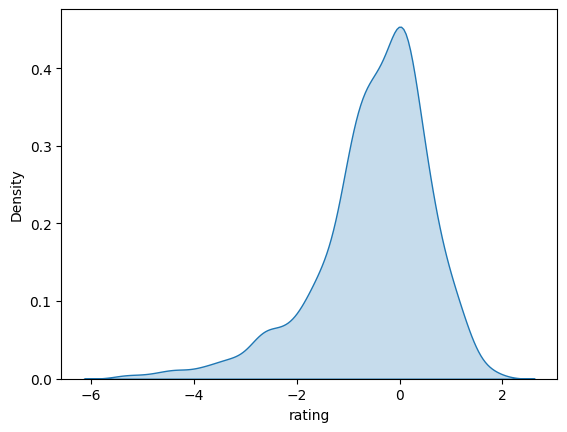

In [49]:
sns.kdeplot(x=residuals,fill=True);
# TR = Veri dağılımını pürüzsüz bir şekilde tahmin etmek için kullanılan bir yoğunluk grafiğidir. Kernel Yoğunluk Tahmini (KDE) ile verinin altında yatan olasılık dağılımını görselleştirir.
# EN = It is a density plot used to smoothly estimate the distribution of data. It visualizes the underlying probability distribution of data using Kernel Density Estimation (KDE).

In [50]:
loss_f=pd.DataFrame(history.history)

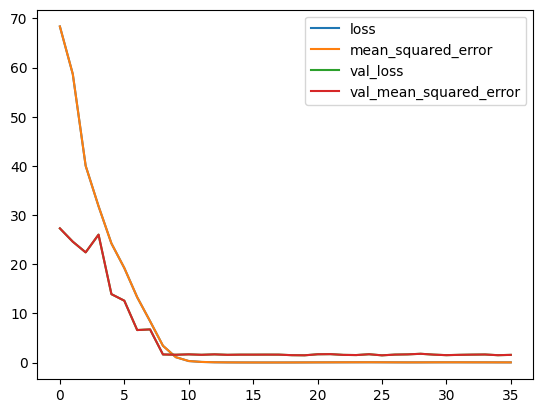

In [51]:
loss_f.plot();

In [52]:
pickle.dump(model,open('Film.pkl','wb'))